In [2]:
%load_ext autoreload
import os

os.chdir("../../../")

In [1]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Import model constructors
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor,
    ExtraTreesClassifier, ExtraTreesRegressor
)
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression


from wfh_share_estimation import *
files  = os.listdir('experiments/results')
files = [f for f in files if f.endswith('.csv')]

classifier_mapping = {
    "RandomForest": RandomForestClassifier,
    "GradientBoosting": GradientBoostingClassifier,
    "ExtraTrees": ExtraTreesClassifier,
    "XGB": XGBClassifier,
    "SVC": SVC,
    "LogisticRegression": LogisticRegression,
    "KNeighbors": KNeighborsClassifier,
    # add additional classifier types if needed
}

regressor_mapping = {
    "RandomForest": RandomForestRegressor,
    "GradientBoosting": GradientBoostingRegressor,
    "ExtraTrees": ExtraTreesRegressor,
    "XGB": XGBRegressor,
    "SVR": SVR,
    "KNeighbors": KNeighborsRegressor,
    "LinearRegression": LinearRegression,
    # add additional regressor types if needed
}

results = pd.DataFrame()
for f in files:
    df = pd.read_csv('experiments/results/' + f)
    df['file'] = f
    results = pd.concat([results, df])

UsageError: Line magic function `%autoreload` not found.


In [ ]:
results.sort_values('correlation_non_zero', ascending=False).head(10)

,evaluation_strategy,n_bootstrap,classifier_type,classifier_params,zero_threshold,regressor_type,regressor_params,f1,mae,mae_non_zero,correlation,correlation_non_zero,file
270,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914337,0.050161,0.105902,0.853330,0.719999,ExtraTrees_clf_SVR_reg_20250217181606.csv
30,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914493,0.050219,0.105955,0.853332,0.719956,ExtraTrees_clf_SVR_reg_20250217181606.csv
630,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915506,0.050177,0.106077,0.853207,0.719885,ExtraTrees_clf_SVR_reg_20250217181606.csv
570,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 5, 'max_fea...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.906586,0.050617,0.106327,0.852248,0.719841,ExtraTrees_clf_SVR_reg_20250217181606.csv
690,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.914402,0.050287,0.106115,0.853009,0.719799,ExtraTrees_clf_SVR_reg_20250217181606.csv
450,bootstrap,100,ExtraTrees,"{'n_estimators': 200, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915222,0.050235,0.106005,0.853122,0.719795,ExtraTrees_clf_SVR_reg_20250217181606.csv
270,bootstrap,100,RandomForest,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915269,0.050098,0.106336,0.853249,0.719718,RandomForest_clf_SVR_reg_20250217221725.csv
390,bootstrap,100,RandomForest,"{'n_estimators': 200, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.916433,0.050082,0.106412,0.853273,0.719702,RandomForest_clf_SVR_reg_20250217221725.csv
90,bootstrap,100,ExtraTrees,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.912046,0.050400,0.106064,0.852884,0.719680,ExtraTrees_clf_SVR_reg_20250217181606.csv
30,bootstrap,100,RandomForest,"{'n_estimators': 100, 'max_depth': None, 'max_...",0.5,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915258,0.050106,0.106349,0.853228,0.719665,RandomForest_clf_SVR_reg_20250217221725.csv


In [ ]:
# Select the experiment with the best performance in non-zero (by correlation_non_zero)
(
    evaluation_strategy_non_zero,
    n_bootstrap_non_zero,
    classifier_type_non_zero,
    classifier_params_non_zero,
    zero_threshold_non_zero,
    regressor_type_non_zero,
    regressor_params_non_zero,
    f1_non_zero,
    mae,               # corresponds to mae; you could rename it if desired
    mae_non_zero,      # already contains non_zero in its name
    correlation,
    correlation_non_zero,
    file_name_non_zero
) = results.sort_values('correlation_non_zero', ascending=False).iloc[0].values

# Select and save the best classifier experiment by sorting by 'f1'
(
    evaluation_strategy_f1,
    n_bootstrap_f1,
    classifier_type_f1,
    classifier_params_f1,
    zero_threshold_f1,
    regressor_type_f1,
    regressor_params_f1,
    f1_f1,
    mae_f1,
    mae_non_zero_f1,
    correlation_f1,
    correlation_non_zero_f1,
    file_name_f1
) = results.sort_values('f1', ascending=False).iloc[0].values

In [ ]:
results[
    (results["classifier_type"] == classifier_type_f1) &
    (results["classifier_params"] == classifier_params_f1) &
    (results["regressor_type"] == regressor_type_non_zero) &
    (results["regressor_params"] == regressor_params_non_zero)
]

,evaluation_strategy,n_bootstrap,classifier_type,classifier_params,zero_threshold,regressor_type,regressor_params,f1,mae,mae_non_zero,correlation,correlation_non_zero,file
270,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.50,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.921572,0.050343,0.106684,0.852161,0.716254,SVC_clf_SVR_reg_20250218015039.csv
271,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.55,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.921806,0.050427,0.106461,0.852358,0.716505,SVC_clf_SVR_reg_20250218015039.csv
272,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.60,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.920976,0.050586,0.106310,0.852368,0.716722,SVC_clf_SVR_reg_20250218015039.csv
273,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.65,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.919191,0.050789,0.106123,0.852313,0.716730,SVC_clf_SVR_reg_20250218015039.csv
274,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.70,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.915749,0.051101,0.106026,0.852058,0.716697,SVC_clf_SVR_reg_20250218015039.csv
275,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.75,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.909316,0.051434,0.105852,0.851776,0.716813,SVC_clf_SVR_reg_20250218015039.csv
276,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.80,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.900817,0.051902,0.105866,0.851231,0.716361,SVC_clf_SVR_reg_20250218015039.csv
277,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.85,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.887764,0.052498,0.105828,0.850595,0.716150,SVC_clf_SVR_reg_20250218015039.csv
278,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.90,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.867858,0.053328,0.105854,0.849710,0.715586,SVC_clf_SVR_reg_20250218015039.csv
279,bootstrap,100,SVC,"{'C': 1.0, 'kernel': 'rbf'}",0.95,SVR,"{'C': 1.0, 'kernel': 'rbf'}",0.817185,0.054913,0.105811,0.848431,0.715242,SVC_clf_SVR_reg_20250218015039.csv


In [ ]:
data_list = ['WORK_ACTIVITIES', 'WORK_CONTEXT']
metric = ['importance', 'context']
data_store = DataStore(data_list = data_list, 
                    metric=metric) 

Zero-Class F1: 0.8888888888888888
Non-Zero MAE: 0.11004107041850343
Overall MAE: 0.06203824606819266


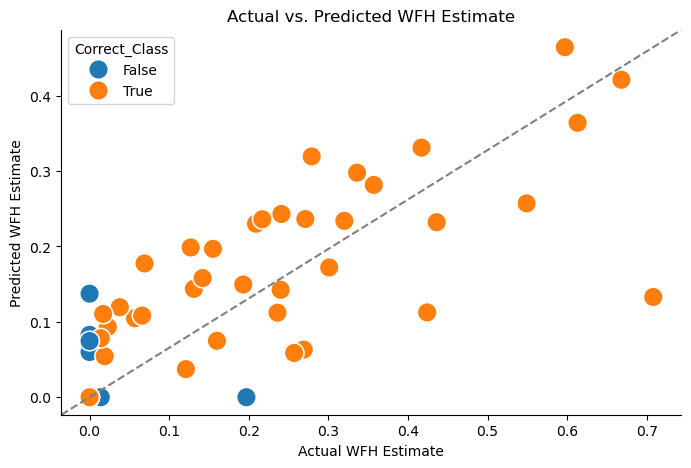

In [ ]:
pipeline = ModelPipeline(
            data=data_store, 
            classifier_model=classifier_mapping[classifier_type_f1](probability = True, **ast.literal_eval(classifier_params_f1)),
            regressor_model=regressor_mapping[regressor_type_non_zero](**ast.literal_eval(regressor_params_non_zero)),
            zero_threshold=zero_threshold_f1
)

pipeline.train()
pipeline.evaluate()
pipeline.plot_manager.show_plot("test_prediction")

Zero-Class F1: 0.9383886255924171
Non-Zero MAE: 0.09033660091034376
Overall MAE: 0.04262083460120068


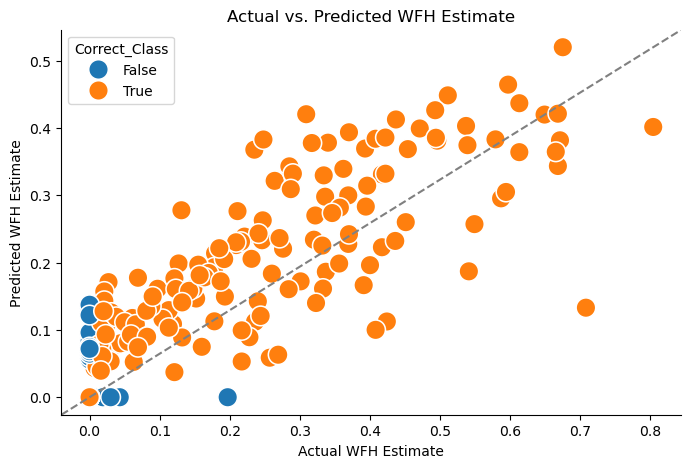

In [ ]:
pipeline.evaluate(include_test=True)
pipeline.plot_manager.show_plot("test_prediction")

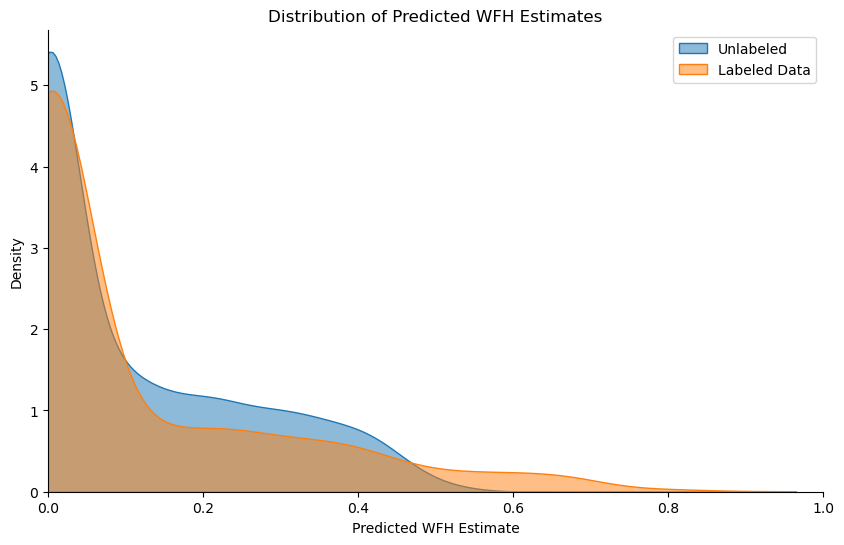

In [ ]:
pipeline.predict_unlabeled()
pipeline.plot_manager.show_plot("unlabeled_prediction")

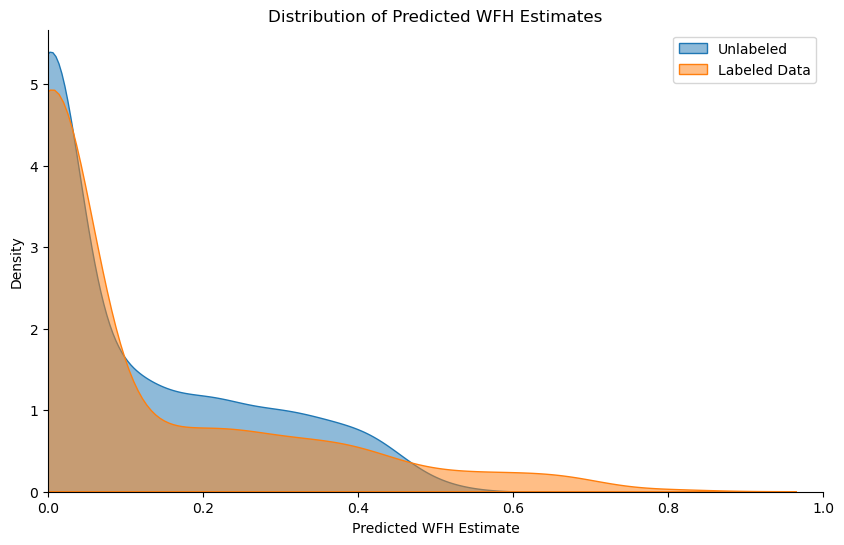

In [ ]:
# Retrain the model with all the data
pipeline.train(include_test=True)
pipeline.predict_unlabeled()
pipeline.plot_manager.show_plot("unlabeled_prediction")

In [ ]:
# Unlabelled data
unlabeled = pipeline.data.unlabeled_data[["ESTIMATE_WFH_ABLE"]]

top_wfh = unlabeled.sort_values('ESTIMATE_WFH_ABLE', ascending=False).head(10)
non_wfh = unlabeled[unlabeled['ESTIMATE_WFH_ABLE'] == 0]

In [ ]:
top_wfh.get_occ_data()

AttributeError: 'NoneType' object has no attribute 'copy'

,ONET_SOC_CODE,ESTIMATE_WFH_ABLE
ONET_SOC_CODE,,
Treasurers and Controllers,11-3031.01,0.525350
Investment Fund Managers,11-3031.03,0.503484
Survey Researchers,19-3022.00,0.479202
Bioinformatics Scientists,19-1029.01,0.476635
Industrial-Organizational Psychologists,19-3032.00,0.468628
Database Architects,15-1243.00,0.459610
Search Marketing Strategists,13-1161.01,0.451255
Clinical Data Managers,15-2051.02,0.448216
Web Administrators,15-1299.01,0.445960


In [ ]:
non_wfh.sample(10).get_occ_data()

AttributeError: 'NoneType' object has no attribute 'copy'

,ONET_SOC_CODE,ESTIMATE_WFH_ABLE
ONET_SOC_CODE,,
Shampooers,39-5093.00,0.0
"Umpires, Referees, and Other Sports Officials",27-2023.00,0.0
Power Plant Operators,51-8013.00,0.0
"Railroad Brake, Signal, and Switch Operators and Locomotive Firers",53-4022.00,0.0
Parking Enforcement Workers,33-3041.00,0.0
Chemical Equipment Operators and Tenders,51-9011.00,0.0
Structural Iron and Steel Workers,47-2221.00,0.0
Podiatrists,29-1081.00,0.0
"Patternmakers, Wood",51-7032.00,0.0
